In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from scipy.integrate import odeint
import py_analyze_tools.tools as pat
import numpy as np

# Frobenius norm with L1 penalty regression

In [2]:
traj = pat.Trajectory("../generate/simple_trajectory_.h5")
traj.counts = traj.counts[:45*500]
traj.add_fusion(0, 1, 2)
traj.add_fission(2, 0, 1)
traj.add_conversion(0, 1)
traj.add_conversion(0, 3)
traj.add_conversion(3, 0)
xi = traj.estimate(.003)

max counts = 6000.0, min nonzero counts = 1.0


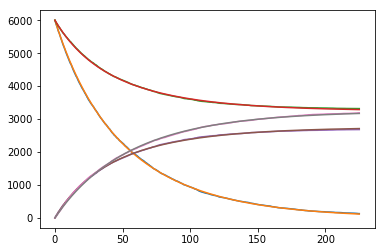

In [3]:
def fun(data, _):
    theta = np.array([f(data) for f in traj.thetas])
    return np.matmul(xi, theta)

num_solution = odeint(fun, traj.counts[0], np.arange(0, traj.n_time_steps*.01, .01))
for i in range(traj.n_species):
    plt.plot(np.arange(0, traj.n_time_steps*.01, .01), traj.counts[:,i])
    plt.plot(np.arange(0, traj.n_time_steps*.01, .01), num_solution[:, i])

# Cross validation

In [12]:
cv = pat.CV(traj)
result = cv.calculate_cost(np.arange(0,1,.01), range(0, 6000), range(6000, traj.n_time_steps))
result_finer = cv.calculate_cost(np.arange(0., 0.004, .00005), range(0, 6000), range(6000, traj.n_time_steps))

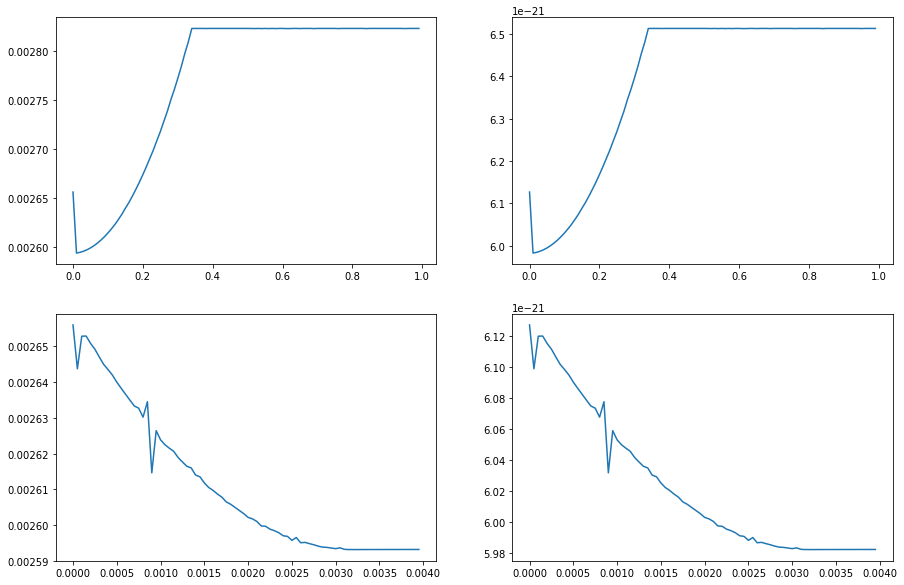

In [15]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(15,10))
ax1.plot(result.alphas, result.costs_test)
ax2.plot(result.alphas, result.relative_cost)
ax3.plot(result_finer.alphas, result_finer.costs_test)
ax4.plot(result_finer.alphas, result_finer.relative_cost)
plt.show()

# Trajectory with back reaction

In [37]:
traj = pat.Trajectory("../generate/simple_trajectory_2.h5")
traj.counts = traj.counts[:60*500]
traj.add_fusion(0, 1, 2)  # A + B -> C
traj.add_fusion(0, 2, 3)  # A + C -> D
traj.add_fusion(0, 3, 2)  # A + D -> C
traj.add_fusion(1, 2, 3)  # B + C -> D
traj.add_fission(2, 0, 1) # C -> A + B
traj.add_fission(0, 1, 2) # A -> B + C
traj.add_conversion(0, 1) # A -> B
traj.add_conversion(0, 3) # A -> D
traj.add_conversion(3, 0) # D -> A
traj.add_conversion(0, 2) # A -> C
traj.add_conversion(1, 2) # B -> C
traj.add_conversion(2, 3) # C -> D
xi = traj.estimate(.0)
print("estimated coefficients: %s" % xi)
traj.rate_info(xi[0])

max counts = 6000.0, min nonzero counts = 1.0
estimated coefficients: [  1.98092697e-06   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.65213817e-05   6.90248650e-10   0.00000000e+00   9.62913871e-03
   9.88922299e-03   9.00130222e-10   0.00000000e+00   1.21190585e-09]
erban chapman rate (per volume): 0.06848398371542153
lasso fitted rate (per counts): 1.980926974951563e-06
lasso fitted rate (per volume): 0.006685628540461525


(0.068483983715421526, 1.9809269749515629e-06, 0.0066856285404615252)

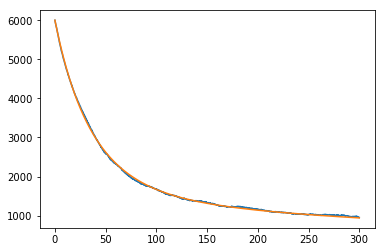

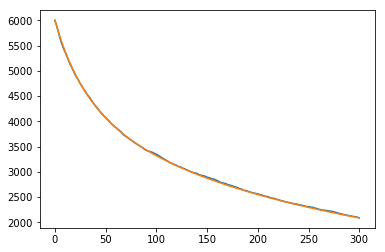

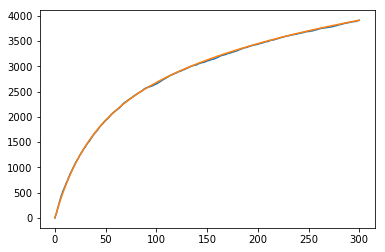

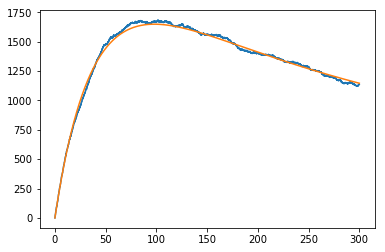

In [38]:
def fun(data, _):
    theta = np.array([f(data) for f in traj.thetas])
    return np.matmul(xi, theta)

num_solution = odeint(fun, traj.counts[0], np.arange(0, traj.n_time_steps*.01, .01))
for i in range(traj.n_species):
    plt.plot(np.arange(0, traj.n_time_steps*.01, .01), traj.counts[:,i])
    plt.plot(np.arange(0, traj.n_time_steps*.01, .01), num_solution[:, i])
    plt.show()

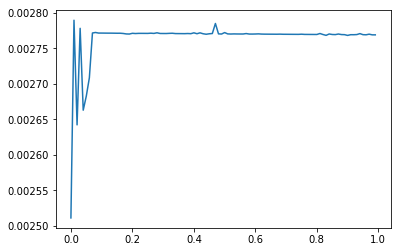

In [39]:
cv = pat.CV(traj)
alphas, cost_learn, cost_test = cv.calculate_cost(np.arange(0,1,.01), range(0, traj.n_time_steps//4), range(traj.n_time_steps//4, 2*traj.n_time_steps//4))
plt.plot(alphas, cost_test)

In [41]:
np.max(traj._large_theta)

36000000.0